In [1]:
##import libs
import numpy as   np
import sklearn.datasets
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
##load datasets
X, y = sklearn.datasets.make_moons(100, noise=0.20)
y = y.reshape(len(y),1)

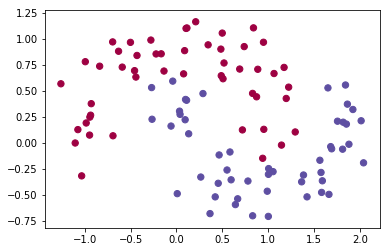

In [3]:
##plot data
plt.figure(1)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [4]:
#Splitting into training and testing set
data_train, data_test, labels_train, labels_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
#Sigmoid Activation Function
def sigmoid_activation_function (x):
    return 1/(1 +  np.exp(-x))

In [6]:
#Derivative of   Sigmoid Function -  to   calculate the slope
def derivatives_sigmoid(x):
    return x *  (1 -  x)

In [7]:
##function to calculate the cost function for loss
def cost_function(ypred,ytarget):
    return np.mean((ytarget-ypred) ** 2)

In [8]:
##no of input neurons
inputlayer_neurons = X.shape[1]
print("Number of features in the dataset: ", inputlayer_neurons)

#number of hidden layers neurons
hiddenL_neurons = 3

#number of neurons at   output layer
output_neurons =  1

Number of features in the dataset:  2


In [9]:
#weight and bias initialization using random function in numpy
wh=np.random.uniform(size=(inputlayer_neurons,hiddenL_neurons))
print("random weight at 1st layer:",wh)
bh=np.random.uniform(size=(1,hiddenL_neurons))
wout=np.random.uniform(size=(hiddenL_neurons,output_neurons))
print("random weight at 1st hidden layer:",wout)
bout=np.random.uniform(size=(1,output_neurons))

random weight at 1st layer: [[ 0.7210876   0.12146141  0.01126722]
 [ 0.70452366  0.50884965  0.19014175]]
random weight at 1st hidden layer: [[ 0.1527907 ]
 [ 0.61755058]
 [ 0.26956056]]


In [10]:
#Setting the number of   epochs aka training iterations
epoch=5000
#Setting learning rate i.e. how much the weight should be changed to correct the error each time
lr=0.1

for i in range(epoch):    
    ##this is a single forward propagation
    out1 = sigmoid_activation_function(np.dot(data_train,wh)+bh)
    ypred= sigmoid_activation_function(np.dot(out1,wout)+bout)
    mse = cost_function(ypred,labels_train)
    ##this is a single backward propagation
    if(i % 100==0):
        print("iteration number: ", i+1)
        print("loss= ",mse)
    if(mse > 0.0001):
        ## weight updates
        E = labels_train-ypred
        outputL_slope = derivatives_sigmoid(ypred)
        hiddenL_slope = derivatives_sigmoid(out1)
        delta_output =  E * outputL_slope
        Error_at_hidden_layer =  np.dot(delta_output, wout.T)
        delta_hiddenlayer  = Error_at_hidden_layer * hiddenL_slope
        wout = wout + np.dot(out1.T,delta_output) *lr
        wh = wh + np.dot (data_train.T,delta_hiddenlayer)*lr
        
        ## biases update
        bh = bh + np.sum(delta_hiddenlayer,axis=0, keepdims = True) *lr
        bout = bout + np.sum(delta_output, axis=0, keepdims = True)*lr

    else:
        print("convergence achived in epochs: ", i+1)
        break
    

iteration number:  1
loss=  0.373821481348
iteration number:  101
loss=  0.111090399243
iteration number:  201
loss=  0.108581584114
iteration number:  301
loss=  0.099267183559
iteration number:  401
loss=  0.0780166002736
iteration number:  501
loss=  0.0684949950581
iteration number:  601
loss=  0.0638696663229
iteration number:  701
loss=  0.0609200743865
iteration number:  801
loss=  0.0586595873516
iteration number:  901
loss=  0.0566873039386
iteration number:  1001
loss=  0.0548338056178
iteration number:  1101
loss=  0.0530277003162
iteration number:  1201
loss=  0.0512390145336
iteration number:  1301
loss=  0.0494718481995
iteration number:  1401
loss=  0.0477971975311
iteration number:  1501
loss=  0.0463642570875
iteration number:  1601
loss=  0.0452531309509
iteration number:  1701
loss=  0.0444068289377
iteration number:  1801
loss=  0.0437417137453
iteration number:  1901
loss=  0.0431987803994
iteration number:  2001
loss=  0.0427414512589
iteration number:  2101
loss=

In [11]:
## test it on test data
out1_test = sigmoid_activation_function(np.dot(data_test,wh)+bh)
ypred_test = sigmoid_activation_function(np.dot(out1_test,wout)+bout)

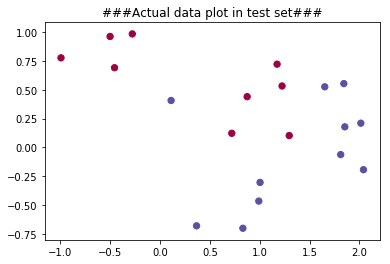

In [12]:
## actual data plot in test set
plt.title("###Actual data plot in test set###")
plt.figure(1)
plt.scatter(data_test[:,0], data_test[:,1], s=40, c=labels_test, cmap=plt.cm.Spectral)
plt.show()

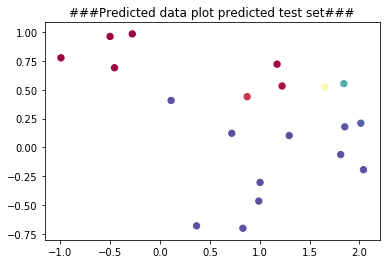

In [13]:
## predicted data plot
plt.title("###Predicted data plot predicted test set###")
plt.figure(1)
plt.scatter(data_test[:,0], data_test[:,1], s=40, c=ypred_test, cmap=plt.cm.Spectral)
plt.show()